In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# DATA LOADING AND IMPUTATION

In [ ]:
crop_ds = pd.read_csv("/content/drive/MyDrive/Datasets/crop.csv")

In [ ]:
crop_ds.dtypes
attr_lst = ["State_Name","Crop","Season","District_Name"]
for attr in attr_lst:
  crop_ds[attr] = crop_ds[attr].str.strip()

In [ ]:
crop_ds.isna().mean()

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       0.015157
dtype: float64

In [ ]:
crop_ds[crop_ds.isna().any(axis=1)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [ ]:
#Selecting Group By and Imputing The Values

crop_ds['Production'] = crop_ds.groupby(["State_Name",'Crop'])['Production'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)

In [ ]:
crop_ds[crop_ds.isna().any(axis=1)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2489,Andhra Pradesh,EAST GODAVARI,2013,Whole Year,Sannhamp,175.0,NaN
3180,Andhra Pradesh,GUNTUR,2013,Whole Year,Sannhamp,2594.0,NaN
5457,Andhra Pradesh,KURNOOL,2013,Whole Year,Sannhamp,18.0,NaN
6266,Andhra Pradesh,PRAKASAM,2013,Whole Year,Sannhamp,1841.0,NaN
9196,Andhra Pradesh,VIZIANAGARAM,2013,Whole Year,Sannhamp,106.0,NaN
...,...,...,...,...,...,...,...
188998,Tamil Nadu,TIRUVANNAMALAI,2005,Kharif,Soyabean,1.0,NaN
189501,Tamil Nadu,TUTICORIN,2005,Kharif,Soyabean,68.0,NaN
189976,Tamil Nadu,VELLORE,2005,Kharif,Niger seed,90.0,NaN
189983,Tamil Nadu,VELLORE,2005,Kharif,Soyabean,11.0,NaN


In [ ]:
# Still 238 Rows Are NaN because of unavalability of any production data for that mean value so now grouping by crop only

crop_ds['Production'] = crop_ds.groupby(['Crop'])['Production'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)

crop_ds.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# HELPHER FUNCTIONS



In [ ]:
# Function to pick a dataset corrosponding to given query

def selectDataset(df,**kwargs):
    cond_str = ""
    for(key, value) in kwargs.items():
        cond_str  = cond_str + f'(df["{key}"]=="{value}")'
        cond_str +="&"
    cond_str = cond_str[:-1]
    sub_df = df.loc[eval(cond_str)]
    return sub_df


# Function to generate Response and Predictor as Numpy array
def getXYArray(df,response,*predictors):
    predictors = list(predictors)
    X = df[predictors].to_numpy()
    Y = df[[response]].to_numpy()
    return X, Y

# DATA VISUALISATION

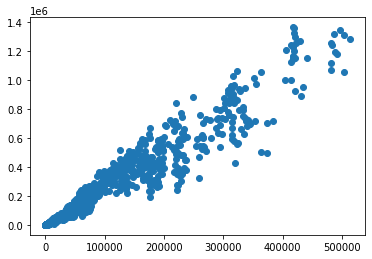

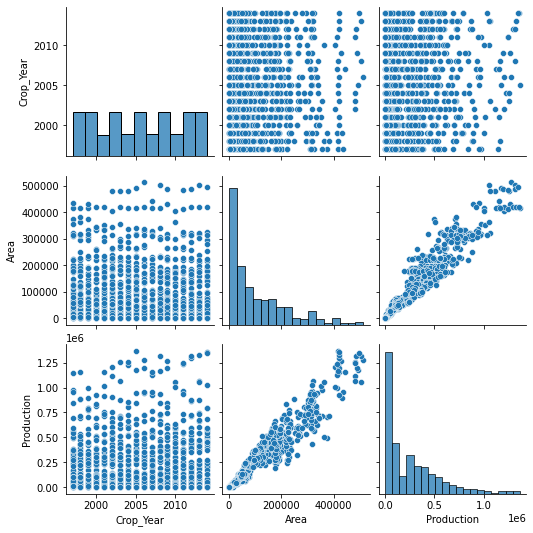

In [ ]:
# Since one crop can't be compared with other crop in terms of Production.
# So We have to manualy filter out a particular crop in a particular state for better predictions.

ds = selectDataset(crop_ds,State_Name="West Bengal",Crop="Rice")

plt.scatter(ds.Area,ds.Production)
plt.show()

sns.pairplot(ds)

In [ ]:
# From Above Plot It's Clearly Visible That Accept "Area" Attribute No Other Attribute Is Showing Good Correlation With "Production"

In [ ]:
ds

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
236478,West Bengal,24 PARAGANAS NORTH,1997,Autumn,Rice,15017.0,33840.0
236490,West Bengal,24 PARAGANAS NORTH,1997,Summer,Rice,98044.0,269690.0
236504,West Bengal,24 PARAGANAS NORTH,1997,Winter,Rice,193202.0,381990.0
236505,West Bengal,24 PARAGANAS NORTH,1998,Autumn,Rice,21417.0,45870.0
236521,West Bengal,24 PARAGANAS NORTH,1998,Summer,Rice,114251.0,425881.0
...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.0,1274.0
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.0,730136.0
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.0,721.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0


# OPTIMIZATION ALGORITHMS

**GRADIENT DESCENT**

In [ ]:
def liniar_reg_grad_des(X,Y,iteration,learning_rate,precision_value):

    import math
    from sklearn.metrics import r2_score

    from sklearn.preprocessing import StandardScaler
    sc=StandardScaler()
    X_transform = sc.fit_transform(X)

    X = X_transform

    num_features = len(X[0])
    num_observation = len(X)
    M = np.zeros((num_features,1))
    B = np.random.rand(num_observation,1)
    Yp = np.matmul(X,M) + B

    prev_cost = 1000000000

    if num_features == 1:
        plt.scatter(X,Y,color="blue") # only 1D

    for i in range(iteration):
        Yp = np.matmul(X,M) + B
        Y_Yp = Y-Yp
        y_yp_2 = (Y-Yp)**2
        cost = (1/num_observation)*sum(y_yp_2)
        Yp_T = Y_Yp.transpose()
        Yp_T_mult_X = np.matmul(Yp_T,X).reshape(-1,1)
        dldm = (-2/num_observation) * Yp_T_mult_X
        dldb = (-2/num_observation) * Y_Yp

        M = M - learning_rate*dldm
        B = B - learning_rate*dldb
        r2 = r2_score(Y,Yp)
        if(i+1 == iteration):
            print("Iteration - ", i+1)
            print("MAE :",sum(abs(Y_Yp)))
            print("MSE : ",sum(y_yp_2))
            print("RMSE :",math.sqrt(sum(y_yp_2)))
            print("r2:",r2)
            print("Coeficient:",list(M))
            print("cost:",cost,"\n-----")
            # print("Coefficients -",M)
            avg_B = np.average(B)
            print("Intercepts -",avg_B)
            if num_features == 1:
                # for i in range(len(B)):
                  plt.plot(X,Yp,color="red") #Only 1D
                  plt.show()

# LINEAR REGRESSION

**Without Spliting**

In [ ]:
# Liniar Regression Without Splitting

def SVLR_Result_NS(df,response,*predictors):
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
  import math

  X = []
  y = df[response].to_numpy().reshape(-1,1)
  for column in predictors:
    X.append(df[column].to_numpy().reshape(-1, 1))
  i = 0
  for column in predictors:
    LR = LinearRegression()
    LR.fit(X[i],y)

    # print(f'\n Showing Results For Column {column}')
    # print("Training Data Predictor:", X[i])
    # print("Training Data Response:" ,y)
    # print("Testing Data Predictor:" ,X[i])
    # print("Testing Data Response:" ,y)

    y_predicted = LR.predict(X[i])
    # print("Preddicted Value for X[i]:" ,y_predicted)

    mse = mean_squared_error(y_pred=y_predicted,y_true=y)
    mae = mean_absolute_error(y_pred=y_predicted,y_true=y)
    r2score = r2_score(y_pred=y_predicted,y_true=y)
    rmse = math.sqrt(mse)
    c = LR.intercept_
    coef = LR.coef_

    print("Intercept :",c)
    print("Coefficient :",coef)
    print("R2 Error :",r2score)
    print("Mean Absolute Error :",mae)
    print("Mean Squared Error :",mse)
    print("Root Mean Squared Error :",rmse)

    # Plot the Liniar regression
    plt.figure()
    plt.scatter(X[i],y,color="Red")
    plt.plot(X[i],LR.predict(X[i]),color="blue")
    plt.title("Linear Regression")
    plt.xlabel("Area")
    plt.ylabel("Production")
    plt.show()

    i = i+1



Intercept : [5281.98855306]
Coefficient : [[2.48030233]]
R2 Error : 0.9234329386716252
Mean Absolute Error : 50566.263438165464
Mean Squared Error : 6508689976.723676
Root Mean Squared Error : 80676.45243020837


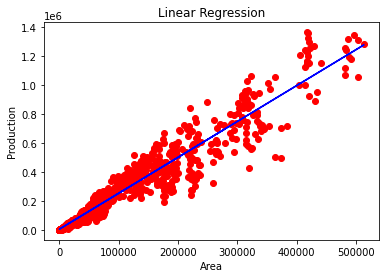

In [ ]:
SVLR_Result_NS(ds,"Production","Area")

**With Splitting**

In [ ]:
# Liniar Regression With Splitting

def SVLR_Result_S(df,test_size,response,*predictors):
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
  import math

  X = []
  y = df[response].to_numpy().reshape(-1,1)
  for column in predictors:
    X.append(df[column].to_numpy().reshape(-1, 1))
  i = 0
  for column in predictors:
    try:
      x_train, x_test, y_train, y_test = train_test_split(X[i],y,test_size = test_size, random_state = 42)
    except:
      return
    LR = LinearRegression()
    LR.fit(x_train,y_train)

    # print(f'\n Showing Results For Column {column}')
    # print("Training Data Predictor:", x_train)
    # print("Training Data Response:" ,y_train)
    # print("Testing Data Predictor:" ,x_test)
    # print("Testing Data Response:" ,y_test)

    y_predicted = LR.predict(x_test)
    # print("Preddicted Value for x_test:" ,y_predicted)

    mse = mean_squared_error(y_pred=y_predicted,y_true=y_test)
    mae = mean_absolute_error(y_pred=y_predicted,y_true=y_test)
    r2score = r2_score(y_pred=y_predicted,y_true=y_test)
    rmse = math.sqrt(mse)
    c = LR.intercept_
    coef = LR.coef_

    print("Intercept :",c)
    print("Coefficient :",coef)
    print("R2 Error :",r2score)
    print("Mean Absolute Error :",mae)
    print("Mean Squared Error :",mse)
    print("Root Mean Squared Error :",rmse)

    # Plot the Liniar regression
    plt.figure()
    plt.scatter(x_train,y_train,color="Red")
    plt.plot(x_train,LR.predict(x_train),color="blue")
    plt.title("Liniar Regression")
    plt.xlabel("Area")
    plt.ylabel("Production")
    plt.show()

    i = i+1



Intercept : [4926.96772754]
Coefficient : [[2.50508771]]
R2 Error : 0.9173889804843391
Mean Absolute Error : 48057.162239407386
Mean Squared Error : 6513167508.853688
Root Mean Squared Error : 80704.1975912882


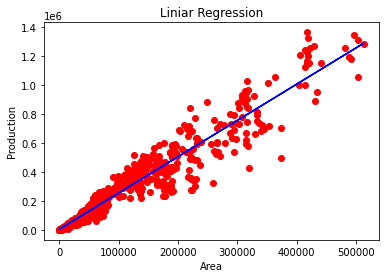

In [ ]:
#70:30
SVLR_Result_S(ds,0.30,"Production","Area")

Intercept : [5924.1895652]
Coefficient : [[2.48276472]]
R2 Error : 0.9127406442717512
Mean Absolute Error : 49908.85282163133
Mean Squared Error : 7132003073.666344
Root Mean Squared Error : 84451.18752075866


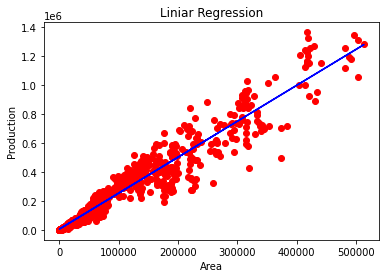

In [ ]:
#80:20
SVLR_Result_S(ds,0.20,"Production","Area")

Intercept : [6668.20371033]
Coefficient : [[2.50295968]]
R2 Error : 0.9162547556002615
Mean Absolute Error : 51523.7808077436
Mean Squared Error : 7135310950.571452
Root Mean Squared Error : 84470.76979980383


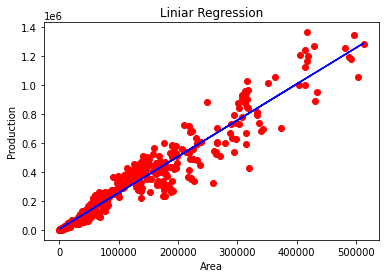

In [ ]:
#50:50
SVLR_Result_S(ds,0.50,"Production","Area")

**Liniar Regression With Gradient Descent Method**

In [ ]:
X,Y = getXYArray(ds,"Production","Area")

Iteration -  500
MAE : [2.33826364e+08]
MSE :  [6.10774429e+13]
RMSE : 7815205.879322977
r2: 0.25850971892909047
Coeficient: [array([279885.58240873])]
cost: [6.30314169e+10] 
-----
Intercepts - 26119.30771210872


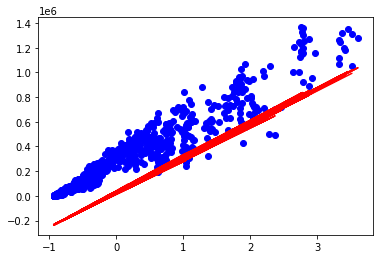

In [ ]:
#L = 0.1
liniar_reg_grad_des(X,Y,500,0.1,0.001)

Iteration -  500
MAE : [2.56539263e+08]
MSE :  [7.35195017e+13]
RMSE : 8574351.388801496
r2: 0.10746106274751899
Coeficient: [array([279874.21795241])]
cost: [7.58715188e+10] 
-----
Intercepts - 2735.0868125806473


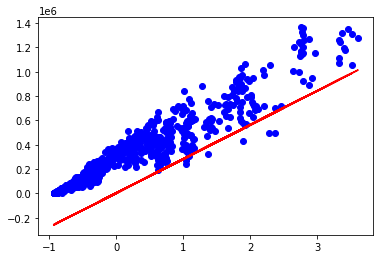

In [ ]:
#L = 0.01
liniar_reg_grad_des(X,Y,500,0.01,0.001)

Iteration -  500
MAE : [2.57826682e+08]
MSE :  [8.51887146e+13]
RMSE : 9229773.270052137
r2: -0.03420511580825125
Coeficient: [array([177130.78655501])]
cost: [8.79140502e+10] 
-----
Intercepts - 275.23107054541407


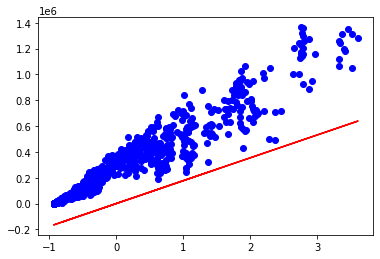

In [ ]:
#L = 0.001
liniar_reg_grad_des(X,Y,500,0.001,0.001)

Iteration -  500
MAE : [1.54833818e+08]
MSE :  [2.67809237e+13]
RMSE : 5175028.855949313
r2: 0.6748751477257273
Coeficient: [array([279885.58370823])]
cost: [2.76376921e+10] 
-----
Intercepts - 107406.65195021918


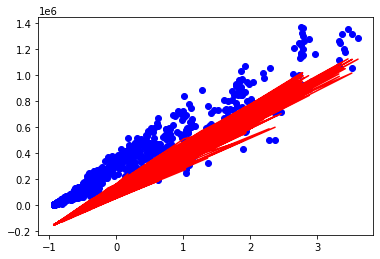

In [ ]:
#L = 0.5
liniar_reg_grad_des(X,Y,500,0.5,0.001)

Iteration -  500
MAE : [2.5782049e+08]
MSE :  [7.42839306e+13]
RMSE : 8618812.60055512
r2: 0.09818076913560925
Coeficient: [array([278056.15975472])]
cost: [7.66604031e+10] 
-----
Intercepts - 1371.3276003973544


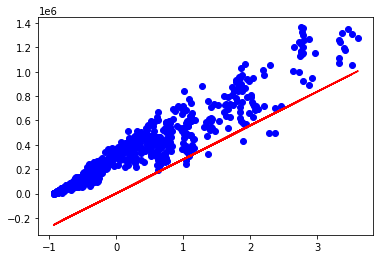

In [ ]:
#L = 0.005
liniar_reg_grad_des(X,Y,500,0.005,0.001)

Iteration -  500
MAE : [2.46184962e+08]
MSE :  [6.77044076e+13]
RMSE : 8228268.810277383
r2: 0.17805726929307186
Coeficient: [array([279885.58318844])]
cost: [6.98703897e+10] 
-----
Intercepts - 13396.126073629


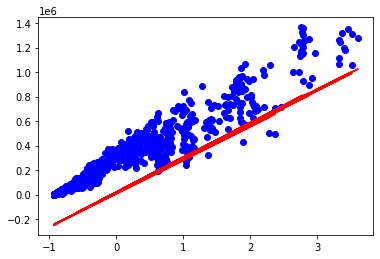

In [ ]:
#L = 0.05
liniar_reg_grad_des(X,Y,500,0.05,0.001)

Iteration -  500
MAE : [6.34632365e+08]
MSE :  [6.04992881e+14]
RMSE : 24596603.04406518
r2: -6.344713859010466
Coeficient: [array([-504820.40286883])]
cost: [6.24347659e+11] 
-----
Intercepts - 171551.53307388065


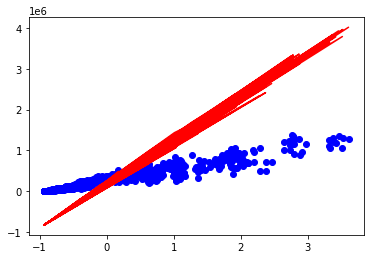

In [ ]:
#L = 1
liniar_reg_grad_des(X,Y,500,1,0.001)

# POLYNOMIAL REGRESSION

**Without Spliting**

In [ ]:
# Polynomial Regression

def PolyReg_NS(ds,deg,*args):  # args order X,Y
  x = ds[args[0]].values.reshape(-1, 1)
  y = ds[args[1]].values.reshape(-1, 1)

  # Polynomial Regression

  from sklearn.preprocessing import PolynomialFeatures
  polynom = PolynomialFeatures(degree = deg)
  x_polynom = polynom.fit_transform(x)

  from sklearn.linear_model import LinearRegression
  PolyRegr = LinearRegression()
  PolyRegr.fit(x_polynom,y)

  # Plot the polynomial regression
  plt.figure()
  plt.scatter(x,y,color="Red")
  plt.plot(x,PolyRegr.predict(polynom.fit_transform(x)),color="blue")
  plt.title("Polynomial Regression")
  plt.xlabel(args[0])
  plt.ylabel(args[1])
  plt.show()

  # import metrics
  y_predict_polyr = PolyRegr.predict(polynom.fit_transform(x))

  from sklearn import metrics
  import math
  from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
  # r_square = metrics.r2_score(y,y_predict_polyr)
  # mse = metrics.mean_squared_error(y,y_predict_polyr)
  # rmse = m.sqrt(mse)
  # print(f"R2 Error :{r_square}\nMSE :{mse}\nRMSE:{rmse}")

  mse = mean_squared_error(y_pred=y_predict_polyr,y_true=y)
  mae = mean_absolute_error(y_pred=y_predict_polyr,y_true=y)
  r2score = r2_score(y_pred=y_predict_polyr,y_true=y)
  rmse = math.sqrt(mse)
  c = PolyRegr.intercept_
  coef = PolyRegr.coef_

  print("Intercept :",c)
  print("Coefficient :",coef)
  print("R2 Error :",r2score)
  print("Mean Absolute Error :",mae)
  print("Mean Squared Error :",mse)
  print("Root Mean Squared Error :",rmse)

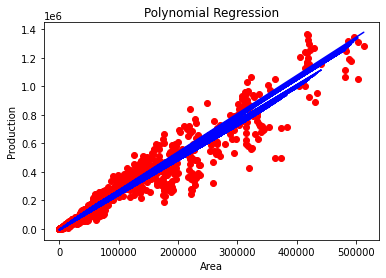

Intercept : [-7911.84975967]
Coefficient : [[ 0.00000000e+00  3.13070231e+00 -4.39004025e-06  6.94422297e-12]]
R2 Error : 0.9257669736309195
Mean Absolute Error : 48734.63175418295
Mean Squared Error : 6310282075.449664
Root Mean Squared Error : 79437.28391284324


In [ ]:
PolyReg_NS(ds,5,"Area","Production")

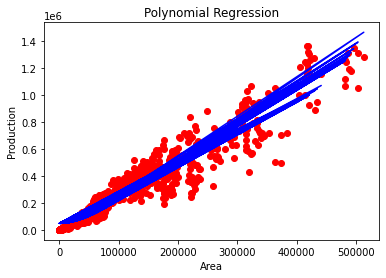

Intercept : [49156.84276396]
Coefficient : [[ 0.00000000e+00 -3.59617187e-09  2.51990448e-05 -8.57301664e-11
   9.18206954e-17]]
R2 Error : 0.9061991744535223
Mean Absolute Error : 63874.159672538255
Mean Squared Error : 7973670171.621366
Root Mean Squared Error : 89295.40957754417


In [ ]:
PolyReg_NS(ds,4,"Area","Production")

***DEG = 3***

---



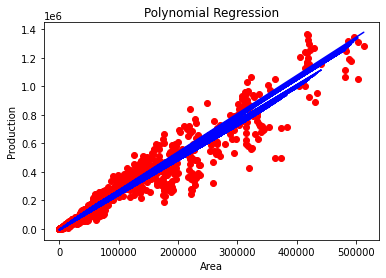

Intercept : [-7911.84975967]
Coefficient : [[ 0.00000000e+00  3.13070231e+00 -4.39004025e-06  6.94422297e-12]]
R2 Error : 0.9257669736309195
Mean Absolute Error : 48734.63175418295
Mean Squared Error : 6310282075.449664
Root Mean Squared Error : 79437.28391284324


In [ ]:
PolyReg_NS(ds,3,"Area","Production")

***DEG = 2***

---



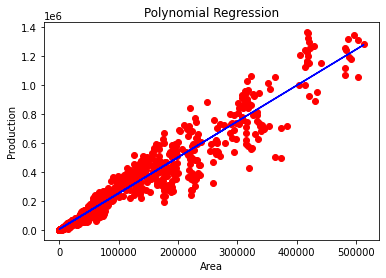

Intercept : [5451.96077128]
Coefficient : [[0.00000000e+00 2.47596330e+00 1.20282415e-08]]
R2 Error : 0.9234333382780779
Mean Absolute Error : 50612.63080676277
Mean Squared Error : 6508656007.6191
Root Mean Squared Error : 80676.24190317185


In [ ]:
PolyReg_NS(ds,2,"Area","Production")

***DEG = 1***

---



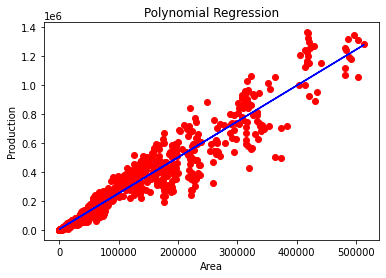

Intercept : [5281.98855306]
Coefficient : [[0.         2.48030233]]
R2 Error : 0.9234329386716252
Mean Absolute Error : 50566.263438165464
Mean Squared Error : 6508689976.723676
Root Mean Squared Error : 80676.45243020837


In [ ]:
PolyReg_NS(ds,1,"Area","Production")

**With Splitting**

In [ ]:
# Polynomial Regression

def PolyReg_S(ds,deg,test_size,*args):  # args order X,Y
  x = ds[args[0]].values
  y = ds[args[1]].values

  # Dataset Splitting
  from sklearn.model_selection import train_test_split
  try:
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=0)
    x_train = x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    y_train= y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
  except:
    return

  # Polynomial Regression

  from sklearn.preprocessing import PolynomialFeatures
  polynom = PolynomialFeatures(degree = deg)
  x_polynom = polynom.fit_transform(x_train)

  from sklearn.linear_model import LinearRegression
  PolyRegr = LinearRegression()
  PolyRegr.fit(x_polynom,y_train)

  # Plot the polynomial regression
  plt.figure()
  plt.scatter(x_train,y_train,color="Red")
  plt.plot(x_train,PolyRegr.predict(polynom.fit_transform(x_train)),color="blue")
  plt.title("Polynomial Regression")
  plt.xlabel(args[0])
  plt.ylabel(args[1])
  plt.show()

  # import metrics
  y_predict_polyr = PolyRegr.predict(polynom.fit_transform(x_test))

  # from sklearn import metrics
  # import math as m
  # r_square = metrics.r2_score(y_test,y_predict_polyr)
  # mse = metrics.mean_squared_error(y_test,y_predict_polyr)
  # rmse = m.sqrt(mse)
  # print(f"R2 Error :{r_square}\nMSE :{mse}\nRMSE:{rmse}")

  from sklearn import metrics
  import math
  from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

  mse = mean_squared_error(y_pred= y_predict_polyr,y_true=y_test)
  mae = mean_absolute_error(y_pred= y_predict_polyr,y_true=y_test)
  r2score = r2_score(y_pred= y_predict_polyr,y_true=y_test)
  rmse = math.sqrt(mse)
  c = PolyRegr.intercept_
  coef = PolyRegr.coef_

  print("Intercept :",c)
  print("Coefficient :",coef)
  print("R2 Error :",r2score)
  print("Mean Absolute Error :",mae)
  print("Mean Squared Error :",mse)
  print("Root Mean Squared Error :",rmse)

DEG=5

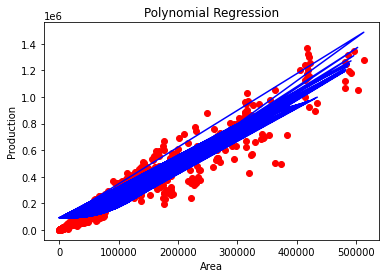

Intercept : [91048.08230848]
Coefficient : [[ 0.00000000e+00 -3.12820358e-14  1.12073535e-15  1.22875723e-10
  -4.67561080e-16  4.83793518e-22]]
R2 Error : 0.8493551910478926
Mean Absolute Error : 88462.89650455693
Mean Squared Error : 11806713044.112282
Root Mean Squared Error : 108658.69980867745


In [ ]:
#70:30
PolyReg_S(ds,5,0.3,"Area","Production")

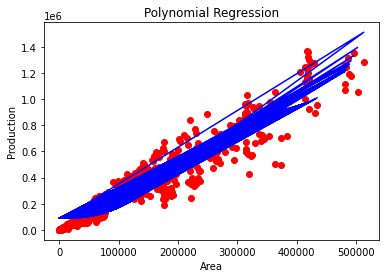

Intercept : [91049.86965133]
Coefficient : [[ 0.00000000e+00 -3.07717930e-15  1.11368270e-15  1.21953898e-10
  -4.63487160e-16  4.80019313e-22]]
R2 Error : 0.8521935357365393
Mean Absolute Error : 85499.46860207808
Mean Squared Error : 10847961640.070887
Root Mean Squared Error : 104153.54837964421


In [ ]:
#80:20
PolyReg_S(ds,5,0.2,"Area","Production")

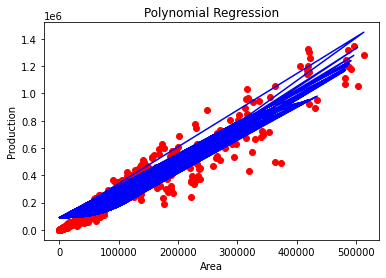

Intercept : [91979.24478488]
Coefficient : [[ 0.00000000e+00  1.59682573e-14  1.10655698e-15  1.21863805e-10
  -4.63574835e-16  4.78768670e-22]]
R2 Error : 0.8613253554057179
Mean Absolute Error : 85655.33134483754
Mean Squared Error : 11359948770.47837
Root Mean Squared Error : 106583.06042931198


In [ ]:
#50:50
PolyReg_S(ds,5,0.5,"Area","Production")

DEG=4

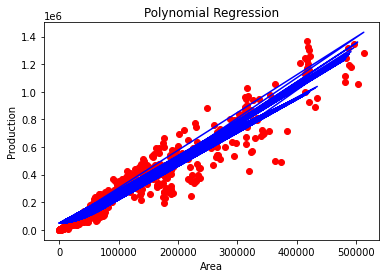

Intercept : [49937.56165943]
Coefficient : [[ 0.00000000e+00  2.99979610e-09  2.49276657e-05 -8.38531962e-11
   8.86721416e-17]]
R2 Error : 0.8988138528767816
Mean Absolute Error : 65468.82338689337
Mean Squared Error : 7930414671.659706
Root Mean Squared Error : 89052.87570685017


In [ ]:
#70:30
PolyReg_S(ds,4,0.3,"Area","Production")

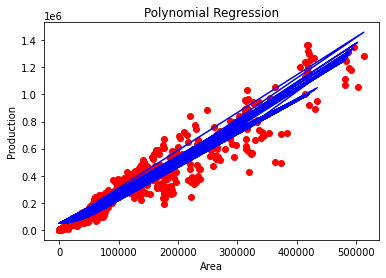

Intercept : [49851.69992944]
Coefficient : [[ 0.00000000e+00 -3.17375653e-09  2.47913157e-05 -8.35871180e-11
   8.90760246e-17]]
R2 Error : 0.9030368679118339
Mean Absolute Error : 61925.306309834334
Mean Squared Error : 7116416339.671425
Root Mean Squared Error : 84358.85454219625


In [ ]:
#80:20
PolyReg_S(ds,4,0.2,"Area","Production")

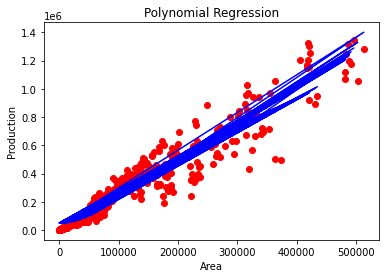

Intercept : [49722.35121184]
Coefficient : [[ 0.00000000e+00 -7.32330852e-10  2.51973439e-05 -8.56503175e-11
   9.07236788e-17]]
R2 Error : 0.9056575896802381
Mean Absolute Error : 63327.53904576457
Mean Squared Error : 7728341047.864022
Root Mean Squared Error : 87910.98365883538


In [ ]:
#50:50
PolyReg_S(ds,4,0.5,"Area","Production")

***DEG = 3***

---



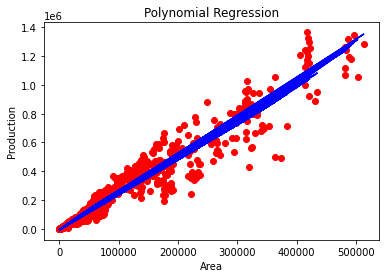

Intercept : [-7438.60533903]
Coefficient : [[ 0.00000000e+00  3.07398214e+00 -3.95585195e-06  6.10445028e-12]]
R2 Error : 0.9210703945494858
Mean Absolute Error : 48860.11959985993
Mean Squared Error : 6186069129.906015
Root Mean Squared Error : 78651.56787951538


In [ ]:
#70:30
PolyReg_S(ds,3,0.3,"Area","Production")

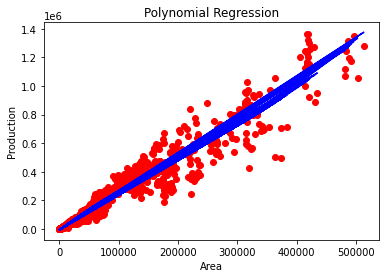

Intercept : [-7429.35174699]
Coefficient : [[ 0.00000000e+00  3.09807261e+00 -4.25855800e-06  6.78079815e-12]]
R2 Error : 0.9255355383977804
Mean Absolute Error : 45335.59319413
Mean Squared Error : 5465171141.429598
Root Mean Squared Error : 73926.79582823536


In [ ]:
#80:20
PolyReg_S(ds,3,0.2,"Area","Production")

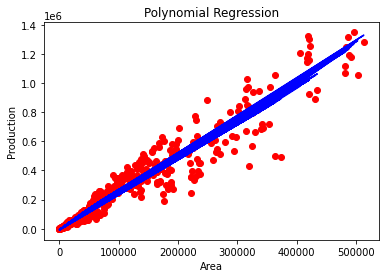

Intercept : [-9376.60796946]
Coefficient : [[ 0.00000000e+00  3.14934996e+00 -4.42826961e-06  6.57252031e-12]]
R2 Error : 0.9257987341331789
Mean Absolute Error : 47566.75772414662
Mean Squared Error : 6078418887.734353
Root Mean Squared Error : 77964.21543076255


In [ ]:
#50:50
PolyReg_S(ds,3,0.5,"Area","Production")

***DEG = 2***

---



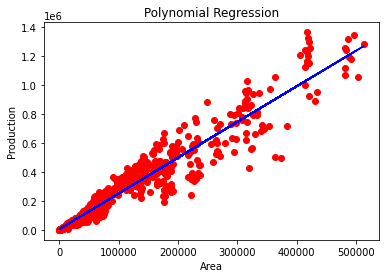

Intercept : [4933.19320589]
Coefficient : [[ 0.00000000e+00  2.48482091e+00 -3.71988724e-08]]
R2 Error : 0.9177575216081156
Mean Absolute Error : 51386.20042907867
Mean Squared Error : 6445713922.464365
Root Mean Squared Error : 80285.20363344895


In [ ]:
#70:30
PolyReg_S(ds,2,0.3,"Area","Production")

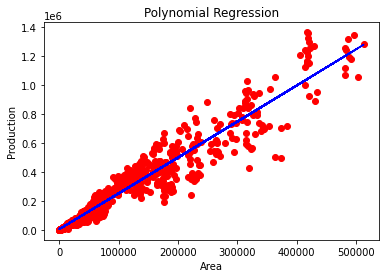

Intercept : [5882.74847181]
Coefficient : [[0.00000000e+00 2.45307035e+00 6.02165082e-08]]
R2 Error : 0.9225845225223525
Mean Absolute Error : 47996.28118168406
Mean Squared Error : 5681755085.679966
Root Mean Squared Error : 75377.41761084659


In [ ]:
#80:20
PolyReg_S(ds,2,0.2,"Area","Production")

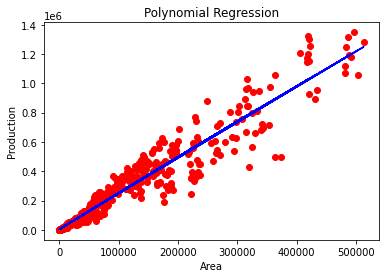

Intercept : [4492.9904169]
Coefficient : [[ 0.00000000e+00  2.49863259e+00 -1.40978182e-07]]
R2 Error : 0.9241180533572656
Mean Absolute Error : 49343.29537684944
Mean Squared Error : 6216096886.259325
Root Mean Squared Error : 78842.22781136594


In [ ]:
#50:50
PolyReg_S(ds,2,0.5,"Area","Production")

***DEG = 1***

---



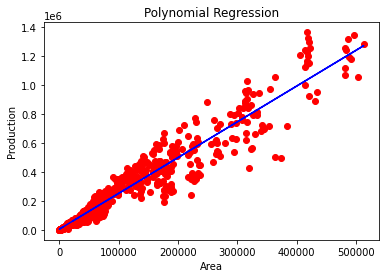

Intercept : [5488.17751199]
Coefficient : [[0.         2.47098687]]
R2 Error : 0.9177855355115445
Mean Absolute Error : 51532.66311210698
Mean Squared Error : 6443518346.517673
Root Mean Squared Error : 80271.52886620307


In [ ]:
#70:30
PolyReg_S(ds,1,0.3,"Area","Production")

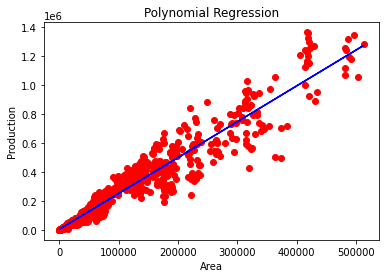

Intercept : [4996.97692332]
Coefficient : [[0.        2.4751901]]
R2 Error : 0.9226724048901314
Mean Absolute Error : 47726.81682771832
Mean Squared Error : 5675305133.986348
Root Mean Squared Error : 75334.62108477316


In [ ]:
#80:20
PolyReg_S(ds,1,0.2,"Area","Production")

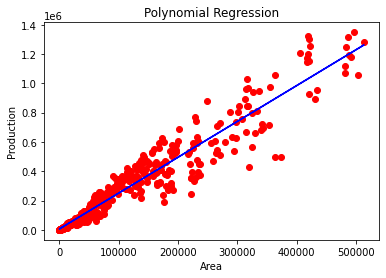

Intercept : [6690.71484845]
Coefficient : [[0.         2.44493247]]
R2 Error : 0.9242464436297912
Mean Absolute Error : 49907.832989316055
Mean Squared Error : 6205579412.623204
Root Mean Squared Error : 78775.50007853459


In [ ]:
#50:50
PolyReg_S(ds,1,0.5,"Area","Production")

**Polynomial Regression With Gradient Descent Method**

In [ ]:
# Polynomial Regression With Gradient Descent

def generate_poly(X,degree = 2): #X = (1*n)
    poly_X  = X
    for d in range(2,degree+1):
        Xi_deg_list = X**d
        deg_list = np.array(Xi_deg_list)
        poly_X = np.concatenate((poly_X,Xi_deg_list))
    poly_X = poly_X.transpose()
    return poly_X


def poly_reg_grad_des(X,Y,iteration,learning_rate,precision_value,deg):
    X = X.reshape(1,-1)
    poly_x = generate_poly(X,deg)
    Y = Y.reshape(-1,1)
    liniar_reg_grad_des(poly_x,Y,iteration,learning_rate,precision_value)

In [ ]:
X,Y = getXYArray(ds,"Production","Area")

DEG=5

FOR 1000 ITERATIONS

In [ ]:
#L = 0.1
poly_reg_grad_des(X,Y,1000,0.1,0.001,5)

Iteration -  1000
MAE : [2.10773372e+08]
MSE :  [4.96111001e+13]
RMSE : 7043514.755879447
r2: 0.39771302135406583
Coeficient: [array([300897.06363911]), array([-35229.84608097]), array([-19348.13130629]), array([24339.70461104]), array([14519.45316218])]
cost: [5.11982457e+10] 
-----
Intercepts - 49676.85580612351


In [ ]:
#L = 0.01
poly_reg_grad_des(X,Y,1000,0.01,0.001,5)

Iteration -  1000
MAE : [2.53961325e+08]
MSE :  [7.2288919e+13]
RMSE : 8502289.046513153
r2: 0.12240054079878404
Coeficient: [array([230481.78006767]), array([65558.07001148]), array([7708.02151989]), array([-10389.74350423]), array([-17719.8296694])]
cost: [7.46015676e+10] 
-----
Intercepts - 5441.6027651821405


In [ ]:
#L = 0.001
poly_reg_grad_des(X,Y,1000,0.001,0.001,5)

Iteration -  1000
MAE : [2.58767189e+08]
MSE :  [7.84784643e+13]
RMSE : 8858807.158241147
r2: 0.04725843568695087
Coeficient: [array([135222.52481678]), array([78227.7184957]), array([39407.2727228]), array([14582.47601985]), array([-1757.91589333])]
cost: [8.09891272e+10] 
-----
Intercepts - 549.6599109762667


In [ ]:
#L = 0.05
poly_reg_grad_des(X,Y,1000,0.05,0.001,5)

Iteration -  1000
MAE : [2.33691583e+08]
MSE :  [6.10069089e+13]
RMSE : 7810691.958797711
r2: 0.2593660141206515
Coeficient: [array([285844.68631567]), array([-5655.15108094]), array([-24212.15208469]), array([7092.72944564]), array([20666.08163014])]
cost: [6.29586263e+10] 
-----
Intercepts - 26118.05419809775


In [ ]:
#L = 0.005
poly_reg_grad_des(X,Y,1000,0.005,0.001,5)

Iteration -  1000
MAE : [2.56619199e+08]
MSE :  [7.39778079e+13]
RMSE : 8601035.282552434
r2: 0.10189714959760665
Coeficient: [array([212567.81657535]), array([83017.80299258]), array([19528.6376032]), array([-12010.65486362]), array([-30074.12295773])]
cost: [7.6344487e+10] 
-----
Intercepts - 2735.0728526091043


FOR 500 ITERATIONS

In [ ]:
#L = 0.1
poly_reg_grad_des(X,Y,500,0.1,0.001,5)

Iteration -  500
MAE : [2.33714464e+08]
MSE :  [6.10188769e+13]
RMSE : 7811458.0501898
r2: 0.25922072068188506
Coeficient: [array([285870.24364324]), array([-5683.40177801]), array([-24233.02846855]), array([7095.12166065]), array([20691.34779739])]
cost: [6.29709772e+10] 
-----
Intercepts - 26119.31831778108


In [ ]:
#L = 0.01
poly_reg_grad_des(X,Y,500,0.01,0.001,5)

Iteration -  500
MAE : [2.56622097e+08]
MSE :  [7.39794837e+13]
RMSE : 8601132.697032087
r2: 0.10187680583330005
Coeficient: [array([212589.63989858]), array([83022.95659409]), array([19524.34037711]), array([-12019.82816379]), array([-30085.73049282])]
cost: [7.63462164e+10] 
-----
Intercepts - 2735.0905154010356


In [ ]:
#L = 0.001
poly_reg_grad_des(X,Y,500,0.001,0.001,5)

Iteration -  500
MAE : [2.603978e+08]
MSE :  [8.26422067e+13]
RMSE : 9090775.912805345
r2: -0.003290087569101985
Coeficient: [array([99428.93651806]), array([68201.66702208]), array([44943.85258024]), array([29182.51619334]), array([18345.66796447])]
cost: [8.5286075e+10] 
-----
Intercepts - 275.21322543119965


In [ ]:
#L = 0.05
poly_reg_grad_des(X,Y,500,0.05,0.001,5)

Iteration -  500
MAE : [2.46140903e+08]
MSE :  [6.77298481e+13]
RMSE : 8229814.583838033
r2: 0.17774841776835626
Coeficient: [array([261843.60280522]), array([27459.14468764]), array([-13318.33417666]), array([-3196.98295866]), array([7602.22443254])]
cost: [6.9896644e+10] 
-----
Intercepts - 13396.12488802598


In [ ]:
#L = 0.005
poly_reg_grad_des(X,Y,500,0.005,0.001,5)

Iteration -  500
MAE : [2.57763763e+08]
MSE :  [7.51172072e+13]
RMSE : 8667018.355754618
r2: 0.08806465387579099
Coeficient: [array([187236.2773381]), array([87808.41142164]), array([28630.71753858]), array([-5908.44399756]), array([-27456.4168935])]
cost: [7.75203376e+10] 
-----
Intercepts - 1371.3108886286145


FOR 100 ITERATIONS

In [ ]:
#L = 0.1
poly_reg_grad_des(X,Y,100,0.1,0.001,5)

Iteration -  100
MAE : [2.54008783e+08]
MSE :  [7.23174753e+13]
RMSE : 8503968.209320312
r2: 0.12205386289094
Coeficient: [array([230545.28173838]), array([65504.38263514]), array([7660.19584265]), array([-10391.63863518]), array([-17670.42311822])]
cost: [7.46310375e+10] 
-----
Intercepts - 5442.115983249048


In [ ]:
#L = 0.01
poly_reg_grad_des(X,Y,100,0.01,0.001,5)

Iteration -  100
MAE : [2.58782787e+08]
MSE :  [7.85087926e+13]
RMSE : 8860518.753268247
r2: 0.04689024497513472
Coeficient: [array([135426.22205776]), array([78300.58575829]), array([39381.31366529]), array([14490.90690985]), array([-1891.91524491])]
cost: [8.10204258e+10] 
-----
Intercepts - 549.685929917555


In [ ]:
#L = 0.001
poly_reg_grad_des(X,Y,100,0.001,0.001,5)

Iteration -  100
MAE : [2.58039634e+08]
MSE :  [9.90596504e+13]
RMSE : 9952871.463376626
r2: -0.2026005749743045
Coeficient: [array([40713.98750158]), array([35659.69959878]), array([30448.52617654]), array([26275.33432183]), array([23037.80676762])]
cost: [1.02228741e+11] 
-----
Intercepts - 55.46751462721478


In [ ]:
#L = 0.5
poly_reg_grad_des(X,Y,100,0.5,0.001,5)

Iteration -  100
MAE : [6.17865169e+62]
MSE :  [1.19519833e+123]
RMSE : 3.4571640583841477e+61
r2: -1.45099058672768e+109
Coeficient: [array([-7.59702724e+59]), array([-8.51936466e+59]), array([-8.63696341e+59]), array([-8.45734826e+59]), array([-8.1784158e+59])]
cost: [1.23343481e+120] 
-----
Intercepts - 0.0


In [ ]:
#L = 0.05
poly_reg_grad_des(X,Y,100,0.05,0.001,5)

Iteration -  100
MAE : [2.56645308e+08]
MSE :  [7.39929071e+13]
RMSE : 8601912.993474025
r2: 0.10171384261764416
Coeficient: [array([212761.929085]), array([83063.3453729]), array([19490.20188268]), array([-12092.18244526]), array([-30176.96620552])]
cost: [7.63600693e+10] 
-----
Intercepts - 2735.2162954370215


In [ ]:
#L = 0.005
poly_reg_grad_des(X,Y,100,0.005,0.001,5)

Iteration -  100
MAE : [2.60427204e+08]
MSE :  [8.26803304e+13]
RMSE : 9092872.507507022
r2: -0.0037529161032141545
Coeficient: [array([99536.85971141]), array([68270.58059503]), array([44980.13240004]), array([29195.72125372]), array([18343.06829655])]
cost: [8.53254184e+10] 
-----
Intercepts - 275.25056199443736


In [ ]:
#L = 1
poly_reg_grad_des(X,Y,100,1,0.001,5)

Iteration -  100
MAE : [1.72237769e+98]
MSE :  [9.28772469e+193]
RMSE : 9.637284206596097e+96
r2: -1.1275451718749395e+180
Coeficient: [array([-4.82959857e+95]), array([-5.41594891e+95]), array([-5.49070904e+95]), array([-5.37652371e+95]), array([-5.19920016e+95])]
cost: [9.5848552e+190] 
-----
Intercepts - 3.823887363874219e+75


DEG=4

FOR 1000 ITERATIONS

In [ ]:
#L = 0.1
poly_reg_grad_des(X,Y,1000,0.1,0.001,4)

Iteration -  1000
MAE : [2.10767141e+08]
MSE :  [4.95991447e+13]
RMSE : 7042666.019087632
r2: 0.39785816261867224
Coeficient: [array([303241.6375491]), array([-44199.78853189]), array([-17729.9048746]), array([43685.2637291])]
cost: [5.11859078e+10] 
-----
Intercepts - 49676.85542869043


In [ ]:
#L = 0.01
poly_reg_grad_des(X,Y,1000,0.01,0.001,4)

Iteration -  1000
MAE : [2.53958493e+08]
MSE :  [7.22362109e+13]
RMSE : 8499188.837146532
r2: 0.12304042636687829
Coeficient: [array([236122.63075091]), array([66793.99064681]), array([180.05174057]), array([-26522.15813647])]
cost: [7.45471733e+10] 
-----
Intercepts - 5441.612414091845


In [ ]:
#L = 0.001
poly_reg_grad_des(X,Y,1000,0.001,0.001,4)

Iteration -  1000
MAE : [2.59289971e+08]
MSE :  [7.8804818e+13]
RMSE : 8877207.783035697
r2: 0.043296446991239135
Coeficient: [array([132730.38505197]), array([78090.32761841]), array([41354.23311432]), array([18071.15183943])]
cost: [8.13259216e+10] 
-----
Intercepts - 549.6562541260065


In [ ]:
#L = 0.05
poly_reg_grad_des(X,Y,1000,0.05,0.001,4)

Iteration -  1000
MAE : [2.33720864e+08]
MSE :  [6.10103323e+13]
RMSE : 7810911.10785553
r2: 0.25932445275373206
Coeficient: [array([281871.57909469]), array([-6775.31989526]), array([-16521.49021005]), array([23814.95959264])]
cost: [6.29621593e+10] 
-----
Intercepts - 26118.02162643136


In [ ]:
#L = 0.005
poly_reg_grad_des(X,Y,1000,0.005,0.001,4)

Iteration -  1000
MAE : [2.56521292e+08]
MSE :  [7.38606982e+13]
RMSE : 8594224.701947318
r2: 0.10331888081738339
Coeficient: [array([218824.10209743]), array([79775.59040241]), array([7386.56656015]), array([-30964.26545395])]
cost: [7.62236308e+10] 
-----
Intercepts - 2735.0861394853073


FOR 500 ITERATIONS

In [ ]:
#L = 0.1
poly_reg_grad_des(X,Y,500,0.1,0.001,4)

Iteration -  500
MAE : [2.33743773e+08]
MSE :  [6.10223192e+13]
RMSE : 7811678.383801509
r2: 0.25917893056409713
Coeficient: [array([281890.99651253]), array([-6805.48109606]), array([-16532.21386683]), array([23838.96664211])]
cost: [6.29745296e+10] 
-----
Intercepts - 26119.310193314363


In [ ]:
#L = 0.01
poly_reg_grad_des(X,Y,500,0.01,0.001,4)

Iteration -  500
MAE : [2.56524078e+08]
MSE :  [7.3862214e+13]
RMSE : 8594312.884618865
r2: 0.10330047958980948
Coeficient: [array([218860.58363048]), array([79781.40370955]), array([7372.26488771]), array([-30990.56362051])]
cost: [7.6225195e+10] 
-----
Intercepts - 2735.086040575854


In [ ]:
#L = 0.001
poly_reg_grad_des(X,Y,500,0.001,0.001,4)

Iteration -  500
MAE : [2.60238252e+08]
MSE :  [8.18563585e+13]
RMSE : 9047450.38432067
r2: 0.006250240323105727
Coeficient: [array([101349.59962134]), array([72797.74686185]), array([51431.82984858]), array([36883.67811962])]
cost: [8.44750861e+10] 
-----
Intercepts - 275.23643192224773


In [ ]:
#L = 0.05
poly_reg_grad_des(X,Y,500,0.05,0.001,4)

Iteration -  500
MAE : [2.46173597e+08]
MSE :  [6.77575065e+13]
RMSE : 8231494.788919551
r2: 0.17741264050340178
Coeficient: [array([258451.51164394]), array([31730.73486129]), array([-8951.8702306]), array([-1819.24527541])]
cost: [6.99251873e+10] 
-----
Intercepts - 13396.116451575486


In [ ]:
#L = 0.005
poly_reg_grad_des(X,Y,500,0.005,0.001,4)

Iteration -  500
MAE : [2.57732996e+08]
MSE :  [7.52953961e+13]
RMSE : 8677291.978663921
r2: 0.08590141104575144
Coeficient: [array([185982.88184131]), array([82478.28046903]), array([20476.52377767]), array([-15835.11353016])]
cost: [7.77042271e+10] 
-----
Intercepts - 1371.323910343907


FOR 100 ITERATIONS

In [ ]:
#L = 0.1
poly_reg_grad_des(X,Y,100,0.1,0.001,4)

Iteration -  100
MAE : [2.54006198e+08]
MSE :  [7.22639052e+13]
RMSE : 8500817.9128012
r2: 0.1227042130093352
Coeficient: [array([236210.03474121]), array([66779.91886484]), array([142.83552149]), array([-26552.77674183])]
cost: [7.45757535e+10] 
-----
Intercepts - 5442.1155514360935


In [ ]:
#L = 0.01
poly_reg_grad_des(X,Y,100,0.01,0.001,4)

Iteration -  100
MAE : [2.59309473e+08]
MSE :  [7.88349952e+13]
RMSE : 8878907.319097592
r2: 0.04293009129192238
Coeficient: [array([132868.08347883]), array([78123.22115753]), array([41313.23676461]), array([17983.65092172])]
cost: [8.13570642e+10] 
-----
Intercepts - 549.6946981972361


In [ ]:
#L = 0.001
poly_reg_grad_des(X,Y,100,0.001,0.001,4)

Iteration -  100
MAE : [2.58039627e+08]
MSE :  [1.00449866e+14]
RMSE : 10022468.071576096
r2: -0.21947802618231393
Coeficient: [array([42072.46873474]), array([37480.71728401]), array([32513.09819889]), array([28456.01212298])]
cost: [1.03663433e+11] 
-----
Intercepts - 55.474540450205005


In [ ]:
#L = 0.5
poly_reg_grad_des(X,Y,100,0.5,0.001,4)

Iteration -  100
MAE : [9.22306195e+50]
MSE :  [2.29522267e+99]
RMSE : 4.790848224548911e+49
r2: -2.786438366889284e+85
Coeficient: [array([-1.02644236e+48]), array([-1.11776631e+48]), array([-1.10916165e+48]), array([-1.06878081e+48])]
cost: [2.36865085e+96] 
-----
Intercepts - 4.186255852146887e+28


In [ ]:
#L = 0.05
poly_reg_grad_des(X,Y,100,0.05,0.001,4)

Iteration -  100
MAE : [2.56546286e+08]
MSE :  [7.38742709e+13]
RMSE : 8595014.307323348
r2: 0.1031541058010993
Coeficient: [array([219152.06906454]), array([79827.86816664]), array([7258.0517068]), array([-31200.55246483])]
cost: [7.62376377e+10] 
-----
Intercepts - 2735.1955681677555


In [ ]:
#L = 0.005
poly_reg_grad_des(X,Y,100,0.005,0.001,4)

Iteration -  100
MAE : [2.60267359e+08]
MSE :  [8.18814473e+13]
RMSE : 9048836.795257682
r2: 0.005945657034277851
Coeficient: [array([101472.42373303]), array([72896.93461276]), array([51508.46988144]), array([36943.30948382])]
cost: [8.45009777e+10] 
-----
Intercepts - 275.24425742935443


In [ ]:
#L = 1
poly_reg_grad_des(X,Y,100,1,0.001,4)

Iteration -  100
MAE : [1.14930808e+88]
MSE :  [3.56408039e+173]
RMSE : 5.969991954299473e+86
r2: -4.326852673664673e+159
Coeficient: [array([-3.03108795e+85]), array([-3.30076791e+85]), array([-3.27535832e+85]), array([-3.15611354e+85])]
cost: [3.67810154e+170] 
-----
Intercepts - 4.451590780953666e+65


DEG=3

FOR 1000 ITERATIONS

In [ ]:
#L = 0.1
poly_reg_grad_des(X,Y,1000,0.1,0.001,3)

Iteration -  1000
MAE : [2.10825481e+08]
MSE :  [4.96208583e+13]
RMSE : 7044207.425796705
r2: 0.39759455590053083
Coeficient: [array([292435.91067117]), array([-43295.28206461]), array([33226.14691246])]
cost: [5.12083161e+10] 
-----
Intercepts - 49676.85772442271


In [ ]:
#L = 0.01
poly_reg_grad_des(X,Y,1000,0.01,0.001,3)

Iteration -  1000
MAE : [2.53901564e+08]
MSE :  [7.21378725e+13]
RMSE : 8493401.70090355
r2: 0.12423427128675679
Coeficient: [array([246022.07858367]), array([57778.50163811]), array([-25600.08606939])]
cost: [7.44456888e+10] 
-----
Intercepts - 5441.6059055259575


In [ ]:
#L = 0.001
poly_reg_grad_des(X,Y,1000,0.001,0.001,3)

Iteration -  1000
MAE : [2.59429161e+08]
MSE :  [7.83871502e+13]
RMSE : 8853651.797470475
r2: 0.04836700419149831
Coeficient: [array([134005.80747466]), array([86306.81631593]), array([54387.30549058])]
cost: [8.08948918e+10] 
-----
Intercepts - 549.6757248837548


In [ ]:
#L = 0.05
poly_reg_grad_des(X,Y,1000,0.05,0.001,3)

Iteration -  1000
MAE : [2.33778083e+08]
MSE :  [6.10570286e+13]
RMSE : 7813899.702367168
r2: 0.2587575528563194
Coeficient: [array([273662.29026455]), array([2768.17894355]), array([4070.72939011])]
cost: [6.30103494e+10] 
-----
Intercepts - 26118.031709985884


In [ ]:
#L = 0.005
poly_reg_grad_des(X,Y,1000,0.005,0.001,3)

Iteration -  1000
MAE : [2.56427334e+08]
MSE :  [7.38956597e+13]
RMSE : 8596258.4699041
r2: 0.10289444297280881
Coeficient: [array([218913.68961933]), array([69095.19203257]), array([-10580.65344489])]
cost: [7.62597107e+10] 
-----
Intercepts - 2735.085720034154


FOR 500 ITERATIONS

In [ ]:
#L = 0.1
poly_reg_grad_des(X,Y,500,0.1,0.001,3)

Iteration -  500
MAE : [2.33800993e+08]
MSE :  [6.10690478e+13]
RMSE : 7814668.75539339
r2: 0.2586116378019727
Coeficient: [array([273667.31931065]), array([2755.78403687]), array([4078.60230965])]
cost: [6.30227531e+10] 
-----
Intercepts - 26119.33283218421


In [ ]:
#L = 0.01
poly_reg_grad_des(X,Y,500,0.01,0.001,3)

Iteration -  500
MAE : [2.56429973e+08]
MSE :  [7.38973238e+13]
RMSE : 8596355.26217564
r2: 0.10287424037563542
Coeficient: [array([218954.44730078]), array([69089.70127827]), array([-10615.13683508])]
cost: [7.62614281e+10] 
-----
Intercepts - 2735.10693133848


In [ ]:
#L = 0.001
poly_reg_grad_des(X,Y,500,0.001,0.001,3)

Iteration -  500
MAE : [2.59133836e+08]
MSE :  [8.01618618e+13]
RMSE : 8953315.68718271
r2: 0.026821710674007404
Coeficient: [array([108584.35103276]), array([84635.16633315]), array([65961.64299755])]
cost: [8.27263796e+10] 
-----
Intercepts - 275.23452778639836


In [ ]:
#L = 0.5
poly_reg_grad_des(X,Y,500,0.5,0.001,3)

Iteration -  500
MAE : [2.92434248e+139]
MSE :  [1.96238958e+276]
RMSE : 1.4008531621434273e+138
r2: -2.3823734797870347e+262
Coeficient: [array([-2.76887928e+136]), array([-2.90581948e+136]), array([-2.80806478e+136])]
cost: [2.02516985e+273] 
-----
Intercepts - 3.331075694126559e+116


In [ ]:
#L = 0.05
poly_reg_grad_des(X,Y,500,0.05,0.001,3)

Iteration -  500
MAE : [2.46194089e+08]
MSE :  [6.77593468e+13]
RMSE : 8231606.574587424
r2: 0.17739029848555454
Coeficient: [array([260710.2815091]), array([34466.32635835]), array([-15959.63831421])]
cost: [6.99270865e+10] 
-----
Intercepts - 13396.121485290962


In [ ]:
#L = 0.005
poly_reg_grad_des(X,Y,500,0.005,0.001,3)

Iteration -  500
MAE : [2.57856924e+08]
MSE :  [7.57146496e+13]
RMSE : 8701416.531057768
r2: 0.08081160328611048
Coeficient: [array([179095.37456301]), array([78318.15251323]), array([19137.81788376])]
cost: [7.81368933e+10] 
-----
Intercepts - 1371.3175308963546


FOR 100 ITERATIONS

In [ ]:
#L = 0.1
poly_reg_grad_des(X,Y,100,0.1,0.001,3)

Iteration -  100
MAE : [2.53949209e+08]
MSE :  [7.21643869e+13]
RMSE : 8494962.442881642
r2: 0.12391238143175343
Coeficient: [array([246299.68476361]), array([57736.23120181]), array([-25830.09869578])]
cost: [7.44730515e+10] 
-----
Intercepts - 5442.107177748803


In [ ]:
#L = 0.01
poly_reg_grad_des(X,Y,100,0.01,0.001,3)

Iteration -  100
MAE : [2.59450214e+08]
MSE :  [7.84073336e+13]
RMSE : 8854791.559178693
r2: 0.048121974301429504
Coeficient: [array([134104.20211003]), array([86344.37794828]), array([54383.46353917])]
cost: [8.09157209e+10] 
-----
Intercepts - 549.6966100083378


In [ ]:
#L = 0.001
poly_reg_grad_des(X,Y,100,0.001,0.001,3)

Iteration -  100
MAE : [2.58039638e+08]
MSE :  [1.03979879e+14]
RMSE : 10197052.480182746
r2: -0.2623329695751635
Coeficient: [array([44016.40747983]), array([39948.87012755]), array([35206.93495494])]
cost: [1.07306377e+11] 
-----
Intercepts - 55.46267732096263


In [ ]:
#L = 0.5
poly_reg_grad_des(X,Y,100,0.5,0.001,3)

Iteration -  100
MAE : [1.88084591e+34]
MSE :  [8.11774109e+65]
RMSE : 9.009850772100587e+32
r2: -9.855072242310403e+51
Coeficient: [array([-1.78085683e+31]), array([-1.86893249e+31]), array([-1.80605972e+31])]
cost: [8.37744179e+62] 
-----
Intercepts - -290479852126.57996


In [ ]:
#L = 0.05
poly_reg_grad_des(X,Y,100,0.05,0.001,3)

Iteration -  100
MAE : [2.56451167e+08]
MSE :  [7.39106753e+13]
RMSE : 8597131.804174379
r2: 0.10271215137976408
Coeficient: [array([219281.91839413]), array([69045.46532512]), array([-10892.2750251])]
cost: [7.62752067e+10] 
-----
Intercepts - 2735.2110261877656


In [ ]:
#L = 0.005
poly_reg_grad_des(X,Y,100,0.005,0.001,3)

Iteration -  100
MAE : [2.59151157e+08]
MSE :  [8.01704248e+13]
RMSE : 8953793.87919285
r2: 0.026717753988876103
Coeficient: [array([108768.11555636]), array([84810.79486349]), array([66120.83140867])]
cost: [8.27352165e+10] 
-----
Intercepts - 275.2366865893103


In [ ]:
#L = 1
poly_reg_grad_des(X,Y,100,1,0.001,3)

Iteration -  100
MAE : [2.82284647e+74]
MSE :  [1.82853501e+146]
RMSE : 1.3522333433142861e+73
r2: -2.21987181661596e+132
Coeficient: [array([-6.80431801e+71]), array([-7.14083851e+71]), array([-6.90061351e+71])]
cost: [1.88703304e+143] 
-----
Intercepts - -6.326090983966517e+51


# MODEL ACCURACY

In [ ]:
import statsmodels.api as sm
#AIC,BIC,RSS
y = ds['Production']

#define predictor variables
x = ds['Area']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.166e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:31:56   Log-Likelihood:                -12323.
No. Observations:                 969   AIC:                         2.465e+04
Df Residuals:                     967   BIC:                         2.466e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5281.9886   3546.109      1.490      0.137   -1676.968    1.22e+04
Area           2.4803      0.023    107.993      0.000       2.435       2.525
==============================================================================
Omnibus:                      134.102   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.848
Skew:                          -0.506   Prob(JB):                    7.22e-155
Kurtosis:                       7.069   Cond. No.                     2.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***`LINEAR`***

---



**CP**

In [ ]:
#CP

m=len(y)
p=1
hat_sigma_squared=(1/(m-p-1))*(model.ssr)
Cp=(1/m)*((model.ssr)+2*hat_sigma_squared)
print(Cp)

6522151589.912349


**AIC**

In [ ]:
print(model.aic)

24649.818392559107


**BIC**

In [ ]:
print(model.bic)

24659.570921782888


**R-Square**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
model = LinearRegression()
y = ds['Production'].values.reshape(-1, 1)

#define predictor variables
x = ds[['Area']].values.reshape(-1, 1)
model.fit(x, y)
r2_score(y,model.predict(x))

0.9234329386716252

**Adjusted R-square**

In [ ]:
#display adjusted R-squared
1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.9233537586702515

In [ ]:
##DEG = 5

x = ds[['Area']].values.reshape(-1, 1)
y = ds['Production'].values.reshape(-1, 1)

from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree = 5)
x_polynom = polynom.fit_transform(x)

import statsmodels.api as sm
X_train_sm=sm.add_constant(x_polynom)
lr=sm.OLS(y,X_train_sm).fit()

print("AIC-",lr.aic)
print("BIC-",lr.bic)

m=len(Y)
p=1
hat_sigma_squared=(1/(m-p-1))*(lr.ssr)
Cp=(1/m)*((lr.ssr)+2*hat_sigma_squared)
print("Cp-",Cp)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


AIC- 25571.186461866593
BIC- 25585.815255702266
Cp- 16843832688.325306


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1960.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:49:52   Log-Likelihood:                -12783.
No. Observations:                 969   AIC:                         2.557e+04
Df Residuals:                     966   BIC:                         2.559e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.739e-26   2.11e-27     36.755      0.000    7.33e-26    8.15e-26
x1         -1.544e-14    4.2e-16    -36.755      0.000   -1.63e-14   -1.46e-14
x2          1.626e-15   4.42e-17     36.755      0.000    1.54e-15    1.71e-15
x3          1.665e-10   4.53e-12     36.755      0.000    1.58e-10    1.75e-10
x4         -6.663e-16   2.38e-17    -27.949      0.000   -7.13e-16    -6.2e-16
x5          7.126e-22   3.06e-23     23.319      0.000    6.53e-22    7.73e-22
==============================================================================
Omnibus:                      100.131   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.889
Skew:                          -0.626   Prob(JB):                     7.20e-46
Kurtosis:                       4.892   Cond. No.                     1.26e+28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+28. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#DEG = 5
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
model = LinearRegression()

#define predictor variables
y = ds['Production'].values.reshape(-1, 1)
# x = ds[['Area']].values.reshape(-1, 1)

model.fit(x_polynom, y)
R2 = r2_score(y,model.predict(x_polynom))

#display adjusted R-squared
ad_R2 = 1 - (1-model.score(x_polynom, y))*(len(y)-1)/(len(y)-x_polynom.shape[1]-1)

print("R2 - ",R2)
print("Ad_R2",ad_R2)

R2 -  0.8617234622306779
Ad_R2 0.860861030602179


In [ ]:
##DEG = 4

x = ds[['Area']].values.reshape(-1, 1)
y = ds['Production'].values.reshape(-1, 1)

from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree = 4)
x_polynom = polynom.fit_transform(x)

import statsmodels.api as sm
X_train_sm=sm.add_constant(x_polynom)
lr=sm.OLS(y,X_train_sm).fit()

print("AIC-",lr.aic)
print("BIC-",lr.bic)

m=len(Y)
p=1
hat_sigma_squared=(1/(m-p-1))*(lr.ssr)
Cp=(1/m)*((lr.ssr)+2*hat_sigma_squared)
print("Cp-",Cp)

AIC- 24983.996904548592
BIC- 24998.625698384265
Cp- 9189024675.846672


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     3994.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:52:17   Log-Likelihood:                -12489.
No. Observations:                 969   AIC:                         2.498e+04
Df Residuals:                     966   BIC:                         2.500e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.544e-15   8.35e-17     42.444      0.000    3.38e-15    3.71e-15
x1          7.905e-10   1.86e-11     42.444      0.000    7.54e-10    8.27e-10
x2          3.085e-05   7.27e-07     42.444      0.000    2.94e-05    3.23e-05
x3          -1.12e-10   4.26e-12    -26.325      0.000    -1.2e-10   -1.04e-10
x4          1.232e-16   5.96e-18     20.667      0.000    1.12e-16    1.35e-16
==============================================================================
Omnibus:                      166.651   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.349
Skew:                          -0.824   Prob(JB):                    1.40e-119
Kurtosis:                       6.293   Cond. No.                     3.53e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+22. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#DEG = 4
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
model = LinearRegression()

#define predictor variables
y = ds['Production'].values.reshape(-1, 1)
# x = ds[['Area']].values.reshape(-1, 1)

model.fit(x_polynom, y)
R2 = r2_score(y,model.predict(x_polynom))

#display adjusted R-squared
ad_R2 = 1 - (1-model.score(x_polynom, y))*(len(y)-1)/(len(y)-x_polynom.shape[1]-1)

print("R2 - ",R2)
print("Ad_R2",ad_R2)

R2 -  0.9061991744535223
Ad_R2 0.9057121504371854


***`POLYNOMIAL`***

---



In [ ]:
##DEG = 3

x = ds[['Area']].values.reshape(-1, 1)
y = ds['Production'].values.reshape(-1, 1)

from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree = 3)
x_polynom = polynom.fit_transform(x)

import statsmodels.api as sm
X_train_sm=sm.add_constant(x_polynom)
lr=sm.OLS(y,X_train_sm).fit()

print("AIC-",lr.aic)
print("BIC-",lr.bic)

m=len(Y)
p=1
hat_sigma_squared=(1/(m-p-1))*(lr.ssr)
Cp=(1/m)*((lr.ssr)+2*hat_sigma_squared)
print("Cp-",Cp)

AIC- 24624.471234321227
BIC- 24639.1000281569
Cp- 6340656287.235999


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     6006.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:53:22   Log-Likelihood:                -12309.
No. Observations:                 969   AIC:                         2.462e+04
Df Residuals:                     966   BIC:                         2.464e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.076e-05   1.87e-06     32.449      0.000    5.71e-05    6.44e-05
x1             2.9688      0.091     32.449      0.000       2.789       3.148
x2          -3.61e-06   6.61e-07     -5.458      0.000   -4.91e-06   -2.31e-06
x3          5.922e-12   1.09e-12      5.414      0.000    3.78e-12    8.07e-12
==============================================================================
Omnibus:                      103.952   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.964
Skew:                          -0.247   Prob(JB):                    6.55e-140
Kurtosis:                       6.954   Cond. No.                     3.71e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#DEG = 3
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
model = LinearRegression()

#define predictor variables
y = ds['Production'].values.reshape(-1, 1)
# x = ds[['Area']].values.reshape(-1, 1)

model.fit(x_polynom, y)
R2 = r2_score(y,model.predict(x_polynom))

#display adjusted R-squared
ad_R2 = 1 - (1-model.score(x_polynom, y))*(len(y)-1)/(len(y)-x_polynom.shape[1]-1)

print("R2 - ",R2)
print("Ad_R2",ad_R2)

R2 -  0.9257669736309195
Ad_R2 0.9254589527746163


In [ ]:
##DEG = 2

x = ds[['Area']].values.reshape(-1, 1)
y = ds['Production'].values.reshape(-1, 1)

from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree = 2)
x_polynom = polynom.fit_transform(x)

import statsmodels.api as sm
X_train_sm=sm.add_constant(x_polynom)
lr=sm.OLS(y,X_train_sm).fit()

print("AIC-",lr.aic)
print("BIC-",lr.bic)

m=len(Y)
p=1
hat_sigma_squared=(1/(m-p-1))*(lr.ssr)
Cp=(1/m)*((lr.ssr)+2*hat_sigma_squared)
print("Cp-",Cp)

AIC- 24651.813335297455
BIC- 24666.442129133127
Cp- 6522117550.551091


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     5825.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:54:21   Log-Likelihood:                -12323.
No. Observations:                 969   AIC:                         2.465e+04
Df Residuals:                     966   BIC:                         2.467e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5451.9608   4279.983      1.274      0.203   -2947.176    1.39e+04
x1             2.4760      0.065     37.924      0.000       2.348       2.604
x2          1.203e-08   1.69e-07      0.071      0.943    -3.2e-07    3.44e-07
==============================================================================
Omnibus:                      133.908   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.269
Skew:                          -0.505   Prob(JB):                    1.59e-154
Kurtosis:                       7.065   Cond. No.                     8.18e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#DEG = 2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
model = LinearRegression()

#define predictor variables
y = ds['Production'].values.reshape(-1, 1)
# x = ds[['Area']].values.reshape(-1, 1)

model.fit(x_polynom, y)
R2 = r2_score(y,model.predict(x_polynom))

#display adjusted R-squared
ad_R2 = 1 - (1-model.score(x_polynom, y))*(len(y)-1)/(len(y)-x_polynom.shape[1]-1)

print("R2 - ",R2)
print("Ad_R2",ad_R2)

R2 -  0.9234333382780779
Ad_R2 0.9231953072053674


In [ ]:
##DEG = 1

x = ds[['Area']].values.reshape(-1, 1)
y = ds['Production'].values.reshape(-1, 1)

from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree = 1)
x_polynom = polynom.fit_transform(x)

import statsmodels.api as sm
X_train_sm=sm.add_constant(x_polynom)
lr=sm.OLS(y,X_train_sm).fit()

print("AIC-",lr.aic)
print("BIC-",lr.bic)

m=len(Y)
p=1
hat_sigma_squared=(1/(m-p-1))*(lr.ssr)
Cp=(1/m)*((lr.ssr)+2*hat_sigma_squared)
print("Cp-",Cp)

AIC- 24649.818392559107
BIC- 24659.570921782888
Cp- 6522151589.912349


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.166e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:56:25   Log-Likelihood:                -12323.
No. Observations:                 969   AIC:                         2.465e+04
Df Residuals:                     967   BIC:                         2.466e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5281.9886   3546.109      1.490      0.137   -1676.968    1.22e+04
x1             2.4803      0.023    107.993      0.000       2.435       2.525
==============================================================================
Omnibus:                      134.102   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.848
Skew:                          -0.506   Prob(JB):                    7.22e-155
Kurtosis:                       7.069   Cond. No.                     2.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#DEG = 1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
model = LinearRegression()

#define predictor variables
y = ds['Production'].values.reshape(-1, 1)
# x = ds[['Area']].values.reshape(-1, 1)

model.fit(x_polynom, y)
R2 = r2_score(y,model.predict(x_polynom))

#display adjusted R-squared
ad_R2 = 1 - (1-model.score(x_polynom, y))*(len(y)-1)/(len(y)-x_polynom.shape[1]-1)

print("R2 - ",R2)
print("Ad_R2",ad_R2)

R2 -  0.9234329386716252
Ad_R2 0.9232744147351275


# OBSERVATIONS

In [ ]:
crop_ds

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
